# 네이버 쇼핑 리뷰 감성 분류
- 주제: 네이버 쇼핑몰 리뷰의 여러 쇼핑몰 리뷰를 모아, 형태소 및 감정 분석을 시행
- 목표: 각 상품에 대한 전반적인 리뷰를 파악하여 keyword 추출 
- 사용성: 추합된 긍정/부정 keyword는 양질의 feedback으로 자리잡아
        1) 현재 시장에서의 제품 인식 분석
        2) 추후 신제품 개발에 이용 

### 1. Crwaling
- 네이버 쇼핑 '멕북 2020 스페이스 그레이' 리뷰 crawling

### 2. Preprocessing : TF-IDF를 이용한 핵심어 추출
- 형태소 추출
- 분류 모델의 학습 데이터로 변환

### 3. 긍정/부정 리뷰 분류
- 분류 모델링
- 분류 모델 개선

### 4. 중요 키워드 분석
- 회귀 모델의 feature 영향력 추출
- 중요 feature의 형태소 파악 

### 5. 한계점

# 2. Preprocessing

In [ ]:
!pip install konlpy
!pip install imblearn
!pip install tweepy==3.10.0

In [461]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import numpy as np

df = pd.read_csv("output.csv")

In [462]:
df.shape

(667, 5)

In [463]:
df.head()

,Unnamed: 0,type,category,review,star
0,1,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,"맥북 말해뭐합니까,,, 너무 예쁘고요,, 영롱하고요,, 그냥 보기만해도 힐링입니다 ...",평점5
1,2,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,딸아이가 평소 넘 갖고 싶어 하는건데..세일한다고 이 기회 놓치기 싫다고 하더군요....,평점5
2,3,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,"선물용으로 구매했는데, 선물주인이 아주 행복해하네요:)\n배송도 안전하고 신속하게 ...",평점5
3,4,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,실버와 스페이스그레이 중 고민고민하다 결국 스그로 구매했습니다!\n생각지도 못했는데...,평점5
4,5,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,저렴하게 좋은 제품 잘구한거 같습니다 ㅎㅎ 이쁘고\n좋네요 ^^ 배송도 매우 빠르고...,평점5


In [464]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  667 non-null    int64 
 1   type        667 non-null    object
 2   category    667 non-null    object
 3   review      667 non-null    object
 4   star        667 non-null    object
dtypes: int64(1), object(4)
memory usage: 26.2+ KB


In [465]:
df['star'][1] #평점 제거 전

'평점5'

In [466]:
df['star'] = df['star'].str.replace("평점", "")

In [467]:
df['star'][1] #평점 제거 후 

'5'

In [468]:
df['star'] = pd.to_numeric(df['star'])

In [469]:
df['star'][1] #object => numeric 

5

## TF-IDF를 이용한 핵심어 추출
### 불용어 제거

In [470]:
#text data를 기계가 분석이 가능한 vector로 정리 한 후 logistic regression 모델로 분류한 후 
#분류 결과를 이용하여 keyword의 부정/긍정확인 

In [471]:
df['review'][1]

'딸아이가 평소 넘 갖고 싶어 하는건데..세일한다고 이 기회 놓치기 싫다고 하더군요..\n모아놓은 용돈이 부족하여 제가 조금 빌려줬네요..하루만에 배송된 맥북을 보고 어찌나 좋아라 하는지..다른 노트북이 있지만, 이게 더 맘에 든다는군요..ㅡ.ㅡ;;\n잘 모르는 저로써는 차이가 먼가 싶지만,\n좋아하는 아이얼굴을 보니 사길 잘한것 같네요'

In [472]:
df.head()

,Unnamed: 0,type,category,review,star
0,1,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,"맥북 말해뭐합니까,,, 너무 예쁘고요,, 영롱하고요,, 그냥 보기만해도 힐링입니다 ...",5
1,2,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,딸아이가 평소 넘 갖고 싶어 하는건데..세일한다고 이 기회 놓치기 싫다고 하더군요....,5
2,3,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,"선물용으로 구매했는데, 선물주인이 아주 행복해하네요:)\n배송도 안전하고 신속하게 ...",5
3,4,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,실버와 스페이스그레이 중 고민고민하다 결국 스그로 구매했습니다!\n생각지도 못했는데...,5
4,5,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,저렴하게 좋은 제품 잘구한거 같습니다 ㅎㅎ 이쁘고\n좋네요 ^^ 배송도 매우 빠르고...,5


In [473]:
#불용어 제거
import re
def clean_str(text):
    pattern = '([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)' # E-mail제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+' # URL제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '([ㄱ-ㅎㅏ-ㅣ]+)'  # 한글 자음, 모음 제거
    text = re.sub(pattern=pattern, repl='', string=text)
    pattern = '<[^>]*>'         # HTML 태그 제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    pattern = '[^\w\s]'         # 특수기호제거
    text = re.sub(pattern=pattern, repl=' ', string=text)
    text = re.sub("\n", " ", string=text) # '\n' 제거
    return text   

# 리뷰에 불용어 제거 
df['review_'] = df['review'].apply(lambda x: clean_str(x))
df.head()
#reference: https://stackoverflow.com/questions/31661307/python-regex-remove-n

,Unnamed: 0,type,category,review,star,review_
0,1,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,"맥북 말해뭐합니까,,, 너무 예쁘고요,, 영롱하고요,, 그냥 보기만해도 힐링입니다 ...",5,맥북 말해뭐합니까 너무 예쁘고요 영롱하고요 그냥 보기만해도 힐링입니다 ...
1,2,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,딸아이가 평소 넘 갖고 싶어 하는건데..세일한다고 이 기회 놓치기 싫다고 하더군요....,5,딸아이가 평소 넘 갖고 싶어 하는건데 세일한다고 이 기회 놓치기 싫다고 하더군요 ...
2,3,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,"선물용으로 구매했는데, 선물주인이 아주 행복해하네요:)\n배송도 안전하고 신속하게 ...",5,선물용으로 구매했는데 선물주인이 아주 행복해하네요 배송도 안전하고 신속하게 진...
3,4,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,실버와 스페이스그레이 중 고민고민하다 결국 스그로 구매했습니다!\n생각지도 못했는데...,5,실버와 스페이스그레이 중 고민고민하다 결국 스그로 구매했습니다 생각지도 못했는데 ...
4,5,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,저렴하게 좋은 제품 잘구한거 같습니다 ㅎㅎ 이쁘고\n좋네요 ^^ 배송도 매우 빠르고...,5,저렴하게 좋은 제품 잘구한거 같습니다 이쁘고 좋네요 배송도 매우 빠르고 친절...


In [474]:
df['review'][1] #불용어 제거 전

'딸아이가 평소 넘 갖고 싶어 하는건데..세일한다고 이 기회 놓치기 싫다고 하더군요..\n모아놓은 용돈이 부족하여 제가 조금 빌려줬네요..하루만에 배송된 맥북을 보고 어찌나 좋아라 하는지..다른 노트북이 있지만, 이게 더 맘에 든다는군요..ㅡ.ㅡ;;\n잘 모르는 저로써는 차이가 먼가 싶지만,\n좋아하는 아이얼굴을 보니 사길 잘한것 같네요'

In [475]:
df['review_'][1]  #불용어 제거 성공

'딸아이가 평소 넘 갖고 싶어 하는건데  세일한다고 이 기회 놓치기 싫다고 하더군요   모아놓은 용돈이 부족하여 제가 조금 빌려줬네요  하루만에 배송된 맥북을 보고 어찌나 좋아라 하는지  다른 노트북이 있지만  이게 더 맘에 든다는군요      잘 모르는 저로써는 차이가 먼가 싶지만  좋아하는 아이얼굴을 보니 사길 잘한것 같네요'

In [476]:
#불용어 제거 성공 확인 후 기존 review 삭제 
del df['review']

### 형태소 단위로 추출
- 위에서는 한글로 전처리를 진행, 아래에서는 Konlp 파일을 통해 형태소 단위로 추출

In [477]:
#!pip install konlpy
# konlpy 다운로드 후 실행 매우 어렵고.. 까다롭다..
# reference: https://blog.naver.com/ji5623ku2/222493586479
# reference: https://blog.naver.com/masonmount323/222500708493

#import tweepy
#print(tweepy.__version__)
#from platform import python_version
#print(python_version())
#pip install tweepy==3.10.0
#pip list

In [478]:
import nltk
import konlpy
from konlpy.tag import Okt; t=Okt()  #오픈 소스 한국어 분석기

In [479]:
# Konlpy 라이브러리로 텍스트 데이터에서 형태소를 추출
def get_pos(x):
    pos = t.pos(x) #pos 형태소와 품사 추출/ nouns 명사만 추출/ morphs 형태소만 추출
    pos = ['{}/{}'.format(word,tag) for word, tag in pos]
    return pos

# 형태소 추출 test
result = get_pos(df['review_'][0])
print(result)

['맥북/Noun', '말/Noun', '해/Verb', '뭐합/Noun', '니까/Josa', '너무/Adverb', '예쁘고요/Adjective', '영롱하고요/Adjective', '그냥/Noun', '보기/Noun', '만해/Noun', '도/Josa', '힐링/Noun', '입니다/Adjective', '음질/Noun', '은/Josa', '또/Noun', '얼마나/Noun', '좋은지/Adjective', '음악/Noun', '들을/Verb', '때/Noun', '마다/Josa', '고막/Noun', '이/Josa', '힐링/Noun', '이에요/Josa', '다만/Noun', '저/Noun', '는/Josa', '게임/Noun', '을/Josa', '즐겨하는/Verb', '편이/Noun', '아님에도/Adjective', '가끔/Noun', '카트라이더/Noun', '가/Josa', '하고싶은데/Verb', '게임/Noun', '이/Josa', '안된다는/Adjective', '단점/Noun', '만/Josa', '빼면/Verb', '완벽합니다/Adjective']


In [480]:
#df.to_csv('token_output.csv', encoding='utf-8-sig', mode='w')

## 분류 모델의 학습 데이터로 변환하기

### corpus index 생성하기

In [481]:
from sklearn.feature_extraction.text import CountVectorizer

# 형태소를 백터 형태의 train data set(X 데이터)로 변환
index_vectorizer = CountVectorizer(tokenizer = lambda x: get_pos(x)) 
# get_pos(x)로 토크나이저 따로 지정하지 않으면, 띄어쓰기로 분류 이를 방지하기 위해 
X = index_vectorizer.fit_transform(df['review_'].tolist())

In [482]:
df['review_'].tolist() # => corpus

['맥북 말해뭐합니까    너무 예쁘고요   영롱하고요   그냥 보기만해도 힐링입니다 음질은 또 얼마나 좋은지 음악 들을때마다 고막이 힐링이에요 다만 저는 게임을 즐겨하는편이 아님에도 가끔 카트라이더가 하고싶은데 게임이 안된다는 단점만 빼면 완벽합니다 ',
 '딸아이가 평소 넘 갖고 싶어 하는건데  세일한다고 이 기회 놓치기 싫다고 하더군요   모아놓은 용돈이 부족하여 제가 조금 빌려줬네요  하루만에 배송된 맥북을 보고 어찌나 좋아라 하는지  다른 노트북이 있지만  이게 더 맘에 든다는군요      잘 모르는 저로써는 차이가 먼가 싶지만  좋아하는 아이얼굴을 보니 사길 잘한것 같네요',
 '선물용으로 구매했는데  선물주인이 아주 행복해하네요   배송도 안전하고 신속하게 진행되었고  제조일이 구매일과 같은 달 상품이라 왠지모를 안심이 되더라구요  선물증정식 후 언박싱 했을 때 맥북에어의 영롱함   특히 스페이스그레이만의 고급짐에 감탄했어요  애플이 애플 했네요    사용하시는 분이 평소에 영상을 많이 보는데  화질 음질이 너무 좋대요  키보드의 촉감도 가볍고  무엇보다 오래 사용해도 발열이 심하지 않은 점이 제일 장점인 것 같아요  애플제품 치고 성능대비 가격이 합리적인 편인데  SSG 현대카드 혜택이 많길래 신규발급 후 기본할인에 청구할인까지 받으니 감동적인 금액에 구입할 수 있었어요  한가지 아쉬운 점은  선물용으로 구매하시는 분들이 있는 것 같은데 선물용 종이가방이 옵션으로 있으면 좋을 것 같아요  좋은제품 구매할 수 있게 해 주셔서 감사합니다  소중한 사람에게 간지와 삶의 질 향상을 동시에 전해주어 뿌듯함과 희열을 느낍니다  앞으로 나올 신제품들도 너무너무 기대되네요 ',
 '실버와 스페이스그레이 중 고민고민하다 결국 스그로 구매했습니다  생각지도 못했는데 배송도 정말 빨라서 좋았어요  그간 윈도 기반 랩탑만 쓰다가 처음 맥북을 구매하게 되었는데 좋은 기회에 잘 구입한 것 같아요  아직 사용법을 익혀나가느라 솔직히 구체적으로 뭐가 좋다고 기재하긴 어렵지만

In [483]:
X.shape #변환이 된 vector 

(667, 2258)

In [484]:
X # 667개의 데이터가 총 2258길이의 vector를 가지고 있는 data set(=총 2258개의 형태소가 있다)

<667x2258 sparse matrix of type '<class 'numpy.int64'>'
	with 7629 stored elements in Compressed Sparse Row format>

In [485]:
print(str(index_vectorizer.vocabulary_)[:100]+"..") #709 벡터의 위치는 '맥북/Noun'을 의미한다 

{'맥북/Noun': 709, '말/Noun': 690, '해/Verb': 2157, '뭐합/Noun': 779, '니까/Josa': 433, '너무/Adverb': 374, '예..


In [486]:
print(df['review_'][0])
print(X[0])

맥북 말해뭐합니까    너무 예쁘고요   영롱하고요   그냥 보기만해도 힐링입니다 음질은 또 얼마나 좋은지 음악 들을때마다 고막이 힐링이에요 다만 저는 게임을 즐겨하는편이 아님에도 가끔 카트라이더가 하고싶은데 게임이 안된다는 단점만 빼면 완벽합니다 
  (0, 709)	1
  (0, 690)	1
  (0, 2157)	1
  (0, 779)	1
  (0, 433)	1
  (0, 374)	1
  (0, 1406)	1
  (0, 1392)	1
  (0, 256)	1
  (0, 868)	1
  (0, 681)	1
  (0, 499)	1
  (0, 2255)	2
  (0, 1619)	1
  (0, 1520)	1
  (0, 1516)	1
  (0, 604)	1
  (0, 1322)	1
  (0, 1816)	1
  (0, 1519)	1
  (0, 576)	1
  (0, 597)	1
  (0, 645)	1
  (0, 202)	1
  (0, 1528)	2
  (0, 1576)	1
  (0, 445)	1
  (0, 1709)	1
  (0, 418)	1
  (0, 180)	2
  (0, 1518)	1
  (0, 1853)	1
  (0, 2035)	1
  (0, 1202)	1
  (0, 73)	1
  (0, 1967)	1
  (0, 68)	1
  (0, 2083)	1
  (0, 1239)	1
  (0, 454)	1
  (0, 654)	1
  (0, 967)	1
  (0, 1453)	1


### TF-IDF 로 변환
- 더 정교한 벡터를 얻기 위하여 특정 문서에만 단어에 가중치를 두는 TF-IDF 실행

In [487]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)

In [488]:
print(X.shape)
print(X[0]) #기존에는 1이였던 값들이 변함

(667, 2258)
  (0, 2255)	0.3274147456651014
  (0, 2157)	0.1335969207708831
  (0, 2083)	0.1637073728325507
  (0, 2035)	0.1637073728325507
  (0, 1967)	0.1637073728325507
  (0, 1853)	0.1637073728325507
  (0, 1816)	0.1637073728325507
  (0, 1709)	0.12273335220819008
  (0, 1619)	0.08361705512160368
  (0, 1576)	0.12755651948551763
  (0, 1528)	0.12902145790338734
  (0, 1520)	0.1539619237672474
  (0, 1519)	0.1637073728325507
  (0, 1518)	0.09561042494851277
  (0, 1516)	0.07895046973208632
  (0, 1453)	0.1637073728325507
  (0, 1406)	0.1637073728325507
  (0, 1392)	0.1637073728325507
  (0, 1322)	0.1637073728325507
  (0, 1239)	0.1637073728325507
  (0, 1202)	0.1637073728325507
  (0, 967)	0.1637073728325507
  (0, 868)	0.1539619237672474
  (0, 779)	0.1637073728325507
  (0, 709)	0.07066214768511507
  (0, 690)	0.10836419953953837
  (0, 681)	0.14704741761612425
  (0, 654)	0.10959704591238119
  (0, 645)	0.1637073728325507
  (0, 604)	0.14168410997239128
  (0, 597)	0.12064201333439448
  (0, 576)	0.163707372832

# 3. 긍/부정 리뷰 분류하기

## 분류 모델링
- 평점에서의 1-3점은 '0'으로 부정적인 리뷰로 처리하였고, 4-5점은 '1'로 긍정적인 리뷰로 처리 

In [489]:
df['star'].replace([3, 2, 1], 0, inplace=True)
df['star'].replace([5, 4], 1, inplace=True)
df['star'].astype('int')

0      1
1      1
2      1
3      1
4      1
      ..
662    0
663    0
664    0
665    0
666    0
Name: star, Length: 667, dtype: int32

In [490]:
df

,Unnamed: 0,type,category,star,review_
0,1,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,1,맥북 말해뭐합니까 너무 예쁘고요 영롱하고요 그냥 보기만해도 힐링입니다 ...
1,2,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,1,딸아이가 평소 넘 갖고 싶어 하는건데 세일한다고 이 기회 놓치기 싫다고 하더군요 ...
2,3,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,1,선물용으로 구매했는데 선물주인이 아주 행복해하네요 배송도 안전하고 신속하게 진...
3,4,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,1,실버와 스페이스그레이 중 고민고민하다 결국 스그로 구매했습니다 생각지도 못했는데 ...
4,5,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,1,저렴하게 좋은 제품 잘구한거 같습니다 이쁘고 좋네요 배송도 매우 빠르고 친절...
...,...,...,...,...,...
662,1,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,0,10 3 주문 10 8배송배송은 얼마든지 느려질수 있다고 생각하나 공지도 없었으며 ...
663,2,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,0,제품은 좋아요 배송도 빨랐구요 근데 공식 애플 스토어 라고 달아놓은게 맞...
664,3,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,0,저 화면에서 렉이걸려서 암것도안되고 강제종료조차 안돼고 별루네요
665,4,맥북 에어 2020년형 M1 256G 스페이스 그레이 MGN63KH/A,별점,0,대구에서 서울까지 오는데 박스포장을 못하면 뽁뽁이라도 해서 보냈어야죠 노트북만 달...


In [491]:
print(df['star'].value_counts())

1    656
0     11
Name: star, dtype: int64


### Logistic Regression
분류 문제를 푸는 지도학습 모델

샘플이 특정 범주에 속할 확률을 측정하는데 사용

In [492]:
# Data set 분리 
from sklearn.model_selection import train_test_split

y = df['star'] #target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape)
print(X_test.shape)

(466, 2258)
(201, 2258)


In [493]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Logistic Regression 
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


#성능 평가
print('\n Classification report:')
print(classification_report(y_test, y_pred)) #recall이 1??


 Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.98      1.00      0.99       197

    accuracy                           0.98       201
   macro avg       0.49      0.50      0.49       201
weighted avg       0.96      0.98      0.97       201



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 분류 모델 개선
### 클래스 불균형 문제 해결 (1) Random Sampling

In [494]:
#!pip install imblearn
#!pip install delayed

In [495]:
df['star'].value_counts()

1    656
0     11
Name: star, dtype: int64

In [496]:
# 1:1 비율로 랜덤 샘플링 수행
pos_50_idx = df[df['star']==1].sample(11, random_state=30).index.tolist() #최대 수가 11(count 0)
neg_50_idx = df[df['star']==0].sample(11, random_state=30).index.tolist()

In [497]:
# 랜덤 데이터로 data set 나누기
random_idx = pos_50_idx + neg_50_idx # pos 11개, neg 11개의 총 22개의 index가 만들어진다.
sample_X = X[random_idx, :] # X 중 random_idx 포함하는 데이터
y =df['star'][random_idx] # y 중 random_idx 포함하는 데이터 
X_train2, X_test2, y_train2, y_test2 = train_test_split(sample_X, y, test_size=0.3)
print(X_train2.shape)
print(X_test2.shape)

(15, 2258)
(7, 2258)


In [498]:
pos_50_idx

[613, 67, 269, 385, 550, 293, 355, 505, 260, 234, 464]

In [499]:
#재학습

# Logistic Regression 
lr = LogisticRegression(random_state=0)
lr.fit(X_train2, y_train2)
y_pred2 = lr.predict(X_test2)
#성능 평가
print('\n Classification report:')
print(classification_report(y_test2, y_pred2)) #recall이 1??


 Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.43      1.00      0.60         3

    accuracy                           0.43         7
   macro avg       0.21      0.50      0.30         7
weighted avg       0.18      0.43      0.26         7



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 클래스 불균형 문제 해결 (2) Oversampling

Oversampling 데이터를 무작위 또는 기준을 정하여 복제하는 것.

Undersampling같이 정보를 잃지 않고, 훈련용 데이터에서 높은 성능을 보이지만 실험용 데이터에서의 성능은 낮아질 수 있음.

In [500]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from collections import Counter

print('before Oversampling:',Counter(y_train))
oversample = RandomOverSampler(sampling_strategy='minority')
X_train3, y_train3 = oversample.fit_resample(X_train, y_train)
print('After Oversampling:',Counter(y_train3))

#reference : https://www.kaggle.com/nareshbhat/fraud-detection-feature-selection-over-sampling

before Oversampling: Counter({1: 459, 0: 7})
After Oversampling: Counter({1: 459, 0: 459})


In [501]:
X_train3

<918x2258 sparse matrix of type '<class 'numpy.float64'>'
	with 15959 stored elements in Compressed Sparse Row format>

In [502]:
y_train3

0      1
1      1
2      1
3      1
4      1
      ..
913    0
914    0
915    0
916    0
917    0
Name: star, Length: 918, dtype: int64

In [503]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train3==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train3==0)))

After OverSampling, counts of label '1': 459
After OverSampling, counts of label '0': 459


Counter({1: 656, 0: 11})


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


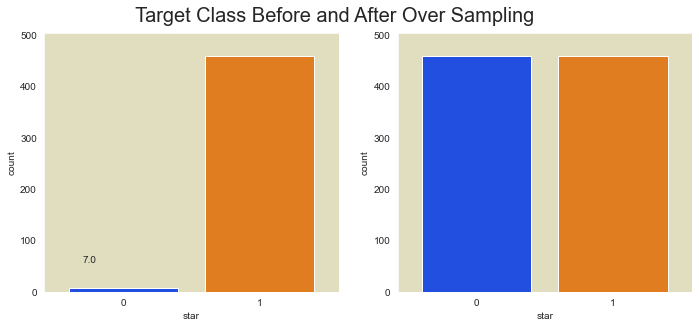

In [504]:
import matplotlib.pyplot as plt
import seaborn as sns
print(Counter(df['star']))
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4.5))
fig.subplots_adjust(bottom=0.10, left=0.10, top = 0.900, right=1.00)
fig.suptitle(' Target Class Before and After Over Sampling', fontsize = 20)
sns.set_palette("bright")
sns.countplot(y_train, ax=ax1)
ax1.margins(0.1)
ax1.set_facecolor("#e1ddbf")
for p in ax1.patches:
        ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_palette("bright")
sns.countplot(y_train3, ax=ax2)
ax2.margins(0.1)
ax2.set_facecolor("#e1ddbf")
for p in ax2.patches:
        ax2.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))
sns.set_style('dark')

In [505]:
#재학습

# Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train3, y_train3)
y_pred3 = lr.predict(X_test)

#성능 평가
print('\n Classification report:')
print(classification_report(y_test, y_pred3)) 


 Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.98      1.00      0.99       197

    accuracy                           0.98       201
   macro avg       0.49      0.50      0.49       201
weighted avg       0.96      0.98      0.97       201



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 클래스 불균형 문제 해결 (3) SMOTE

대부분의 Ovesampling 방법은 Overfitting 문제를 포함하고 있고, 이를 피하기 위하여 SMOTE를 사용. SMOTE는 데이터 수의 적은 클래스의 sample을 가져온 뒤에 임의의 값을 추가하여 새로운 sample을 만들어 데이터에 추가함. 이 과정에서 각 표본은 주변 데이터를 고려하기 때문에 과대 적합의 가능성이 낮아짐

In [506]:
print('before SMOTE:',Counter(y_train))
sm = SMOTE(sampling_strategy='minority')
X_train4, y_train4 = sm.fit_resample(X_train, y_train)
print('After SMOTE:',Counter(y_train4))

before SMOTE: Counter({1: 459, 0: 7})
After SMOTE: Counter({1: 459, 0: 459})


In [507]:
#재학습

# Logistic Regression 
lr = LogisticRegression()
lr.fit(X_train4, y_train4)
y_pred4 = lr.predict(X_test)

#성능 평가
print('\n Classification report:')
print(classification_report(y_test, y_pred4)) 


 Classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.98      1.00      0.99       197

    accuracy                           0.98       201
   macro avg       0.49      0.50      0.49       201
weighted avg       0.96      0.98      0.97       201



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 4. 중요 키워드 분석

Logistic Regression의 경우 회귀분석모형입니다.

회귀 분석은 각x의 계수들이 회귀 분석에 어느정도 영향을 미치는지 알아내는 것이라고 할 수 있다. x값이 크면 y 값에 크게 영향을 미치기 때문

<BarContainer object of 2258 artists>

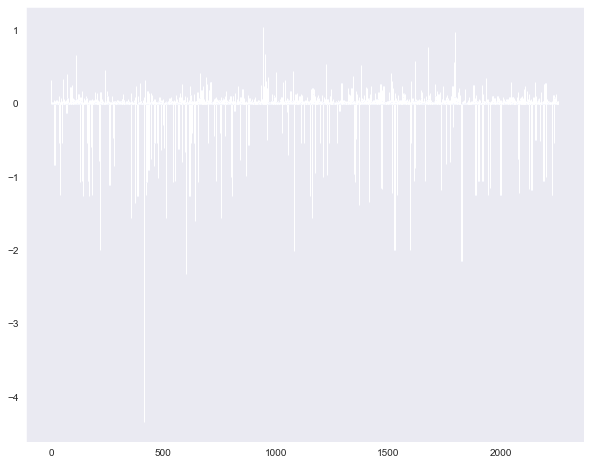

In [508]:
# 학습한 회귀 모델의 계수를 출력
plt.rcParams['figure.figsize'] = [10, 8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])
# 총 2258개의 단어 학습
# 양수 부분은 y가 1(긍정)이라는 것과 가깝고, 음수 부분은 0(부정)과 가깝다고 생각


In [516]:
#상위, 하위 5개 뽑기 
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])

[(1.0483860422460527, 944), (0.9716067507678077, 1798), (0.7750079820765424, 1676), (0.6799452837815508, 950), (0.6606466355689853, 110)]
[(-1.9980881029768591, 1599), (-2.0094216574514774, 1082), (-2.1430378531609002, 1826), (-2.317065013478908, 600), (-4.341148129313074, 412)]


In [510]:
# 944번, 1798번 단어가 긍정과 가깝게
# 217번, 1528번 단어가 부정과 가깝게

### 중요 feature의 형태소

In [511]:
# 회귀 모델의 계수를 높은 순으로 정렬
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])), reverse=True)

In [512]:
# 회귀 모델의 계수를 index_vectorizer에 맵핑하여, 어떤 형태소인지 출력
invert_index_vectorizer = {v: k for k, v in index_vectorizer.vocabulary_.items()}

# 계수가 높은 순으로 feature에 형태소를 맵핑한 결과 출력
# 계수가 높은 feature는 리뷰에 긍정적인 영향을 주는 형태소
print(str(invert_index_vectorizer)[:100]+'...')

{709: '맥북/Noun', 690: '말/Noun', 2157: '해/Verb', 779: '뭐합/Noun', 433: '니까/Josa', 374: '너무/Adverb', 14...


In [513]:
# 상위 20개의 긍정 형태소를 출력
for coef in coef_pos_index[:20]:
    print(invert_index_vectorizer[coef[1]], coef[0])

빠르고/Adjective 1.0483860422460527
좋아요/Adjective 0.9716067507678077
잘/Verb 0.7750079820765424
빠른/Adjective 0.6799452837815508
감사합니다/Verb 0.6606466355689853
입니다/Adjective 0.5748644828303231
좋습니다/Adjective 0.5606292927692644
아주/Noun 0.5461200664932188
역시/Noun 0.5319333986014857
구매/Noun 0.4625850406854611
성능/Noun 0.44732044739193455
잘/VerbPrefix 0.44237472146162243
사용/Noun 0.4279923507162782
만족/Noun 0.419621143474711
으로/Josa 0.4192287421990224
가격/Noun 0.3998513816634769
없이/Adverb 0.37189037939109476
빠르게/Adjective 0.370906529517865
빨리/Adverb 0.3652243589841201
말/Noun 0.36384668794218505


In [517]:
# 하위 20개의 부정 형태소를 출력
for coef in coef_pos_index[-20:]:
    print(invert_index_vectorizer[coef[1]], coef[0])

라도/Josa -1.2580217714967985
넘었고/Verb -1.2580217714967985
걸릴/Verb -1.2580217714967985
같으면/Adjective -1.2580217714967985
예전/Noun -1.3400848309450006
너무/Adverb -1.361576958804075
여기/Noun -1.3819272190619627
쌩쌩/Adverb -1.5576432248213528
무거워/Noun -1.5576432248213528
돌아가니깐/Verb -1.5576432248213528
느렸어요/Adjective -1.5576432248213528
날씨/Noun -1.5576432248213528
리/Noun -1.6024602012224465
공식/Noun -1.990809457328856
이/Josa -1.9934012112289
인거/Josa -1.9980881029768591
셀러/Noun -2.0094216574514774
주문/Noun -2.1430378531609002
때문/Noun -2.317065013478908
느려요/Adjective -4.341148129313074


# 5. 정리

## 네이버 쇼핑 리뷰 감성 분류
- 주제: 네이버 쇼핑몰 리뷰의 여러 쇼핑몰 리뷰를 모아, 형태소 및 감정 분석을 시행
- 목표: 각 상품에 대한 전반적인 리뷰를 파악하여 keyword 추출 
- 사용성: 추합된 긍정/부정 keyword는 양질의 feedback으로 자리잡아
        1) 현재 시장에서의 제품 인식 분석
        2) 추후 신제품 개발에 이용 
        
## 한계점

### 1. Imbalanced data 해결력 부족

### 2. 모델 다양성 부족


